In [1]:
import pandas as pd
import datetime
df = pd.read_csv('All_Shark_Data.csv', parse_dates=['Date'])
analytics = pd.read_csv('AllSharkAnalytical.csv')
two_cols = pd.read_csv('All_Shark_Data_2NewCols.csv')
df.rename(columns={'Eat_Total ': 'Eat_Total'}, inplace=True)
df.head(10)

import seaborn as sns
sns.set_style('darkgrid')
df

,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,Eat_GR2,...,Mazuri Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6)
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,2020-09-22,6.0,0.0,1.0,2.0,6.0,0.0,4.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
578,2020-09-24,0.0,9.0,0.0,7.0,5.0,5.0,7.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
580,2020-09-27,5.0,6.0,3.0,6.0,4.0,6.0,3.0,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN


In [3]:
min(df.Date)

Timestamp('2017-12-05 00:00:00')

In [3]:
df2019 = df[(df.Date >= '2019-05-30') & (df.Date < '2020-01-01')]
df2019.head()



,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,Eat_GR2,...,Mazuri Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6)
306,2019-05-30,7.0,0.0,3.0,0.0,0.0,0.0,4.0,4.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
307,2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
308,2019-06-02,7.0,3.0,2.0,1.0,5.0,0.0,1.0,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
309,2019-06-04,2.0,7.0,0.0,3.0,0.0,2.0,3.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
310,2019-06-06,8.0,2.0,0.0,4.0,5.0,5.0,4.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [5]:
df.at[60, 'Date'] = datetime.datetime.strptime('2018-03-22', "%Y-%m-%d")

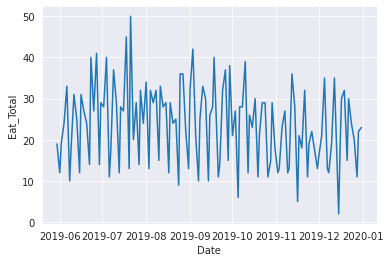

In [4]:
import seaborn as sns
ax = sns.lineplot(x=df2019.Date, y=df2019.Eat_Total, data=df2019)

In [2]:
# consolidate food combos into single column
food_combo = []
foods = ['Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring', 'Sardine',
         'Salmon', 'Bonito', 'Bluefish', 'Mahi', 'Goggle Eye', 'Humbolt Squid', 'Garlic']

for index, row in df.iterrows():
    food = ''
    
    for item in foods:
        if row[item] == 1:
            food += item + '_'
    # get rid of extra _
    food = food[0:(len(food)-1)]
            
    food_combo.append(food)

df['food_combo'] = food_combo

food_combos2 = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos2 = food_combos2.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos2

,food_combo,counts
0,Mackerel_Garlic,108
1,Saury_Garlic,96
2,Herring,89
3,Blue Runner_Squid_Garlic,67
4,Herring_Garlic,33
5,Mackerel,29
6,Saury_Salmon_Garlic,25
7,Blue Runner_Garlic,16
8,Saury,16
9,Blue Runner_Squid,10


In [10]:
food_combos = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos = food_combos.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos

,food_combo,counts
0,Mackerel_Garlic,108
1,Saury_Garlic,96
2,Herring,89
3,Blue Runner_Squid_Garlic,67
4,Herring_Garlic,33
5,Mackerel,29
6,Saury_Salmon_Garlic,25
7,Blue Runner_Garlic,16
8,Saury,16
9,Blue Runner_Squid,10


In [3]:
food_combos2.counts.sum()

582

In [9]:
analytics
for col in analytics.columns:
    print(col)

Unnamed: 0
Date
Eat_Total
AvgPiecesPerShark
Drop_Total
AvgDropsPerShark
Target_Total
AvgTargetsPerShark
SharkCount
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
food_combo


In [10]:
for col in two_cols.columns:
    print(col)

Unnamed: 0
Date
Week_Day
Eat_Ross
Eat_Chandler
Eat_BT1
Eat_BT2
Eat_BT3
Eat_BT4
Eat_BT5
Eat_GR1
Eat_GR2
Eat_GR3
Eat_GR4
Eat_GR5
Eat_Total
SharkCount
AvgPiecesPerShark
Drop_Ross
Drop_Chandler
Drop_BT1
Drop_BT2
Drop_BT3
Drop_BT4
Drop_BT5
Drop_GR1
Drop_GR2
Drop_GR3
Drop_GR4
Drop_GR5
Drop_Total
AvgDropsPerShark
Target_Ross
Target_Chandler
Target_BT1
Target_BT2
Target_BT3
Target_BT4
Target_BT5
Target_GR1
Target_GR2
Target_GR3
Target_GR4
Target_GR5
Target_Total
AvgTargetsPerShark
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
BT/SB Location (1-6)
GR Location (1-6)
food_combo
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71


In [6]:
import warnings
warnings.filterwarnings('ignore')

eats = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).sum().reset_index()
counts = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).count().reset_index().rename(columns={'Eat_Total':'counts'})
targets = df[['food_combo', 'Target_Total']].groupby(['food_combo']).sum().reset_index()
drops = df[['food_combo', 'Drop_Total']].groupby(['food_combo']).sum().reset_index()
garlic = df[['food_combo', 'Garlic']].groupby(['food_combo']).sum().reset_index()
vitamins = df[['food_combo', 'Mazuri Vitamins']].groupby(['food_combo']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_pct'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj = counts[0:21]
counts_adj['eat_target_pct'] = round(counts_adj.eat_totals / counts_adj.target_total, 2)
counts_adj

,food_combo,counts,target_total,eat_totals,drop_totals,total_garlic,total_vitamins,eat_pct,eat_target_pct
0,Mackerel_Garlic,108,6464,2099,338,108.0,2.0,19.4,0.32
1,Saury_Garlic,96,6239,2612,368,96.0,84.0,27.2,0.42
2,Herring,89,2120,1013,85,0.0,2.0,11.4,0.48
3,Blue Runner_Squid_Garlic,67,4854,1894,354,67.0,62.0,28.3,0.39
4,Herring_Garlic,33,1111,402,68,33.0,1.0,12.2,0.36
5,Mackerel,29,1634,454,115,0.0,2.0,15.7,0.28
6,Saury_Salmon_Garlic,25,1336,652,86,25.0,23.0,26.1,0.49
7,Blue Runner_Garlic,16,1034,363,91,16.0,12.0,22.7,0.35
8,Saury,16,1096,385,78,0.0,2.0,24.1,0.35
9,Blue Runner_Squid,10,684,206,81,0.0,2.0,20.6,0.30


In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'Eat_Ross', 'Eat_Chandler', 'Eat_BT1', 'Eat_BT2',
       'Eat_BT3', 'Eat_BT4', 'Eat_BT5', 'Eat_GR1', 'Eat_GR2', 'Eat_GR3',
       'Eat_GR4', 'Eat_GR5', 'Eat_Total', 'SharkCount', 'AvgPiecesPerShark',
       'Drop_Ross', 'Drop_Chandler', 'Drop_BT1', 'Drop_BT2', 'Drop_BT3',
       'Drop_BT4', 'Drop_BT5', 'Drop_GR1', 'Drop_GR2', 'Drop_GR3', 'Drop_GR4',
       'Drop_GR5', 'Drop_Total', 'AvgDropsPerShark', 'Target_Ross',
       'Target_Chandler', 'Target_BT1', 'Target_BT2', 'Target_BT3',
       'Target_BT4', 'Target_BT5', 'Target_GR1', 'Target_GR2', 'Target_GR3',
       'Target_GR4', 'Target_GR5', 'Target_Total', 'AvgTargetsPerShark',
       'Temperature', 'Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring',
       'Sardine', 'Mazuri Vitamins', 'Garlic', 'Salmon', 'Bonito', 'Bluefish',
       'Mahi', 'Goggle Eye', 'Humbolt Squid', 'BT/SB Location (1-6)',
       'GR Location (1-6)', 'food_combo', 'food_combogarlic'],
      dtype='object')

In [50]:
df_bt2 = df[['Date', 'Eat_BT1', 'Eat_BT5', 'Eat_GR1', 'Eat_Ross', 'Eat_Chandler', 'Drop_BT1',
              'Drop_BT5', 'Drop_GR1', 'Drop_Ross', 'Drop_Chandler', 'Target_BT1',
              'Target_BT5', 'Target_GR1', 'Target_Ross', 'Target_Chandler',
               'Temperature', 'BT/SB Location (1-6)', 'food_combo', 'food_combogarlic', 'Garlic', 'Mazuri Vitamins']]
df_bt2['Eat_Total'] = df_bt2.Eat_BT1 + df_bt2.Eat_BT5 + df_bt2.Eat_GR1 + df_bt2.Eat_Ross + df_bt2.Eat_Chandler
df_bt2['Target_Total'] = df_bt2.Target_BT1 + df_bt2.Target_BT5 + df_bt2.Target_GR1 + df_bt2.Target_Ross + df_bt2.Target_Chandler
df_bt2['Drop_Total'] = df_bt2.Drop_BT1 + df_bt2.Drop_BT5 + df_bt2.Drop_GR1 + df_bt2.Drop_Ross + df_bt2.Drop_Chandler


eats = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).sum().reset_index()
counts = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).count().reset_index().rename(
    columns={'Eat_Total':'counts'})
targets = df_bt2[['food_combogarlic', 'Target_Total']].groupby(['food_combogarlic']).sum().reset_index()
drops = df_bt2[['food_combogarlic', 'Drop_Total']].groupby(['food_combogarlic']).sum().reset_index()
garlic = df_bt2[['food_combogarlic', 'Garlic']].groupby(['food_combogarlic']).sum().reset_index()
vitamins = df_bt2[['food_combogarlic', 'Mazuri Vitamins']].groupby(['food_combogarlic']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_avg'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj_bt2 = counts[0:20]
counts_adj_bt2['eat_target_pct'] = round(counts_adj_bt2.eat_totals / counts_adj_bt2.target_total, 2)
counts_adj_bt2['avg_targets'] = round(counts_adj_bt2.target_total / counts_adj_bt2.counts, 2)
counts_adj_bt2

,food_combogarlic,counts,target_total,eat_totals,drop_totals,total_garlic,total_vitamins,eat_avg,eat_target_pct,avg_targets
0,Saury_Garlic,96,3134.0,1250.0,168.0,103.0,91.0,13.0,0.40,32.65
1,Blue Runner_Squid_Garlic,67,2552.0,925.0,151.0,67.0,62.0,13.8,0.36,38.09
2,Saury_Salmon_Garlic,25,611.0,284.0,31.0,25.0,23.0,11.4,0.46,24.44
3,Blue Runner_Garlic,16,566.0,180.0,37.0,16.0,12.0,11.2,0.32,35.38
4,Saury,16,545.0,177.0,40.0,0.0,2.0,11.1,0.32,34.06
5,Blue Runner_Squid_Salmon_Garlic,9,296.0,114.0,18.0,9.0,9.0,12.7,0.39,32.89
6,Blue Runner_Squid,9,341.0,105.0,34.0,0.0,2.0,11.7,0.31,37.89
7,Blue Runner_Squid_Mahi_Garlic,6,237.0,69.0,12.0,6.0,6.0,11.5,0.29,39.50
8,Blue Runner,5,174.0,53.0,12.0,0.0,1.0,10.6,0.30,34.80
9,Blue Runner_Squid_Bonito_Garlic,5,171.0,67.0,8.0,5.0,5.0,13.4,0.39,34.20


In [13]:
counts_adj.to_csv('food_combo_counts.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,Eat_GR2,...,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6),food_combo
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner_Squid_Mackerel
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,Herring
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Mackerel
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
5,2017-12-14,9.0,0.0,1.0,1.0,0.0,4.0,2.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner_Squid
6,2017-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,Herring
7,2017-12-17,1.0,1.0,1.0,3.0,1.0,2.0,2.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Mackerel
8,2017-12-19,2.0,3.0,5.0,2.0,3.0,0.0,3.0,5.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
9,2017-12-21,4.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner


In [7]:
df['month'] = pd.DatetimeIndex(df.Date).month_name()
df['year'] = pd.DatetimeIndex(df.Date).year
df['day'] = pd.DatetimeIndex(df.Date).day_name()
df

,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,Eat_GR2,...,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6),food_combo,month,year,day
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,Saury_Garlic,December,2017,Tuesday
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner_Squid_Mackerel_Garlic,December,2017,Thursday
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,NaN,3.0,Herring_Garlic,December,2017,Saturday
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,NaN,Mackerel_Garlic,December,2017,Sunday
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,3.0,Saury_Garlic,December,2017,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,2020-09-22,6.0,0.0,1.0,2.0,6.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,Saury_Garlic,September,2020,Tuesday
578,2020-09-24,0.0,9.0,0.0,7.0,5.0,5.0,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,2.0,Blue Runner_Squid_Garlic,September,2020,Thursday
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,...,0.0,0.0,0.0,0.0,NaN,3.0,Herring,September,2020,Saturday
580,2020-09-27,5.0,6.0,3.0,6.0,4.0,6.0,3.0,NaN,NaN,...,0.0,0.0,0.0,0.0,3.0,NaN,Mackerel_Garlic,September,2020,Sunday


In [35]:
years = [2018, 2019, 2020]
df_bt = df[['Eat_BT1', 'Eat_BT2', 'Eat_BT3', 'Eat_BT4', 'Eat_BT5', 'year', 'month', 'day']]
df_bt['Total'] = df_bt.Eat_BT1 + df_bt.Eat_BT2 + df_bt.Eat_BT3 + df_bt.Eat_BT4 + df_bt.Eat_BT5
df_bt['AvgPieces_BT'] = df_bt.Total / 5

df_gr = df[['Eat_GR1', 'Eat_GR2', 'Eat_GR3', 'Eat_GR4', 'Eat_GR5', 'year', 'month', 'day']]
df_gr['Total'] = df_gr.Eat_GR1 + df_gr.Eat_GR2 + df_gr.Eat_GR3 + df_gr.Eat_GR4 + df_gr.Eat_GR5
df_gr['AvgPieces_GR'] = df_gr.Total / 5

df_rc = df[['Eat_Ross', 'Eat_Chandler', 'year', 'month', 'day']]
df_rc['Total'] = df_rc.Eat_Ross + df_rc.Eat_Chandler
df_rc['AvgPieces_Ross&Chandler'] = df_rc.Total / 2

for year in years:
    df_months_bt = df_bt[df_bt.year == year]
    df_months_gr = df_gr[df_gr.year == year]
    df_months_rc = df_rc[df_rc.year == year]
    
    if year == 2018:
        months_bt = df_months_bt[['month', 'AvgPieces_BT']].groupby(['month']).mean().reset_index()
        months_bt = months_bt.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_bt['year'] = year
        months_bt['month_adj'] = months_bt['month'] + str(year)
        
        months_gr = df_months_gr[['month', 'AvgPieces_GR']].groupby(['month']).mean().reset_index()
        months_gr = months_gr.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_gr['year'] = year
        months_gr['month_adj'] = months_gr['month'] + str(year)
        
        months_rc = df_months_rc[['month', 'AvgPieces_Ross&Chandler']].groupby(['month']).mean().reset_index()
        months_rc = months_rc.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_rc['year'] = year
        months_rc['month_adj'] = months_rc['month'] + str(year)
    
    else:
        months_2_bt = df_months_bt[['month', 'AvgPieces_BT']].groupby(['month']).mean().reset_index()
        months_2_bt = months_2_bt.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_bt['year'] = year
        months_2_bt['month_adj'] = months_2_bt['month'] + str(year)
        months_bt = months_bt.append(months_2_bt)
        
        months_2_gr = df_months_gr[['month', 'AvgPieces_GR']].groupby(['month']).mean().reset_index()
        months_2_gr = months_2_gr.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_gr['year'] = year
        months_2_gr['month_adj'] = months_2_gr['month'] + str(year)
        months_gr = months_gr.append(months_2_gr)
        
        months_2_rc = df_months_rc[['month', 'AvgPieces_Ross&Chandler']].groupby(['month']).mean().reset_index()
        months_2_rc = months_2_rc.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_rc['year'] = year
        months_2_rc['month_adj'] = months_2_rc['month'] + str(year)
        months_rc = months_rc.append(months_2_rc)
        
    months_bt = months_bt.reset_index().drop(columns=['index', 'month'])
    months_gr = months_gr.reset_index().drop(columns=['index', 'month'])
    months_rc = months_rc.reset_index().drop(columns=['index', 'month'])

months['Avg_BT'] = round(months_bt['AvgPieces_BT'], 2)

months['Avg_GR'] = round(months_gr['AvgPieces_GR'], 2)

months['Avg_Ross&Chandler'] = round(months_rc['AvgPieces_Ross&Chandler'], 2)

months

,month,AvgPiecesPerShark,year,month_adj,Avg_BT,Avg_GR,Avg_Ross&Chandler
0,01Jan,1.73,2018,01Jan2018,1.55,1.37,2.62
1,02Feb,2.00,2018,02Feb2018,2.02,1.10,3.50
2,03Mar,1.77,2018,03Mar2018,1.46,1.00,4.85
3,04Apr,1.82,2018,04Apr2018,2.00,1.52,2.92
4,05May,2.08,2018,05May2018,2.43,1.54,3.11
5,06Jun,1.93,2018,06Jun2018,2.02,1.48,3.50
6,07Jul,1.99,2018,07Jul2018,2.46,1.46,2.29
7,08Aug,2.26,2018,08Aug2018,2.80,1.69,2.38
8,09Sep,2.03,2018,09Sep2018,2.40,1.49,2.62
9,10Oct,2.03,2018,10Oct2018,2.65,1.48,2.04


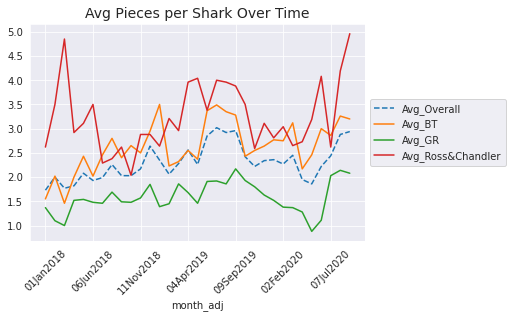

In [38]:
import matplotlib.pylab as plt 
%matplotlib inline

a1 = months.plot(x='month_adj', 
                 y='AvgPiecesPerShark', 
                 label='Avg_Overall',
                 linestyle='--');

plt.plot(months['month_adj'],
         months['Avg_BT'],
         label = 'Avg_BT')

plt.plot(months['month_adj'],
         months['Avg_GR'],
         label = 'Avg_GR')

plt.plot(months['month_adj'],
         months['Avg_Ross&Chandler'],
         label = 'Avg_Ross&Chandler')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation = 45);
plt.title('Avg Pieces per Shark Over Time', size=14);

In [8]:
month_lookup = pd.DataFrame({
       'id':['January','February','March','April','May','June','July','August','September','October','November','December'],
    'label':['01Jan','02Feb','03Mar','04Apr','05May','06Jun','07Jul','08Aug','09Sep','10Oct','11Nov', '12Dec']})

In [ ]:
years = [2018, 2019, 2020]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for year in years:
    df_year = df[df.year == year]
    
    for month in months:
        df_month = df_year[df_year.month == month]
        
        